In [1]:
import pandas as pd

In [130]:
df = pd.read_csv('medical_examination.csv')
#upload file

In [38]:
df.head()
#overview

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [131]:
df["overweight"] = df["weight"]/((df["height"]/100)*(df["height"]/100))
#calculate bmi of the people by dividing weight in kg by square of height in m
df["overweight"]

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Name: overweight, Length: 70000, dtype: float64

In [132]:
df.loc[df["overweight"] > 25, "overweight"] = 1
df.loc[df["overweight"] != 1, "overweight"] = 0

In [133]:
df["overweight"]

0        0.0
1        1.0
2        0.0
3        1.0
4        0.0
        ... 
69995    1.0
69996    1.0
69997    1.0
69998    1.0
69999    0.0
Name: overweight, Length: 70000, dtype: float64

In [95]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.0,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.0,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.0,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.0,23.011177


In [134]:
df.loc[df["cholesterol"] == 1, "cholesterol"] = 0
df.loc[df["cholesterol"] > 1, "cholesterol"] = 1
#normalizing data to 1=bad and 0=good

In [135]:
df["cholesterol"]

0        0
1        1
2        1
3        0
4        0
        ..
69995    0
69996    1
69997    1
69998    0
69999    1
Name: cholesterol, Length: 70000, dtype: int64

In [121]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,0.0


In [136]:
df.loc[df["gluc"]  == 1, "gluc"] = 0
df.loc[df["gluc"] > 1, "gluc"] = 1

In [123]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0


In [137]:
lfdf = df.melt(value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

In [140]:
cardf = df.melt(id_vars = ['cardio'], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

In [148]:
cardf = pd.DataFrame(data=cardf.value_counts(), columns=['total']).sort_index().reset_index()

In [150]:
import seaborn as sb
cardf

,cardio,variable,value,total
0,0,active,0.0,6378
1,0,active,1.0,28643
2,0,alco,0.0,33080
3,0,alco,1.0,1941
4,0,cholesterol,0.0,29330
5,0,cholesterol,1.0,5691
6,0,gluc,0.0,30894
7,0,gluc,1.0,4127
8,0,overweight,0.0,15915
9,0,overweight,1.0,19106


In [160]:
#how does catplot work? pass the x variable which is the name of the column, pass in y as total as that is the name of the total column
#the hue differentiates the values 
#the column that we want to plot with is cardio
#then the data as data=cardf
#then kind to specify bar
chart = sb.catplot(x='variable', y='total', hue='value', col='cardio', data=cardf, kind='bar')


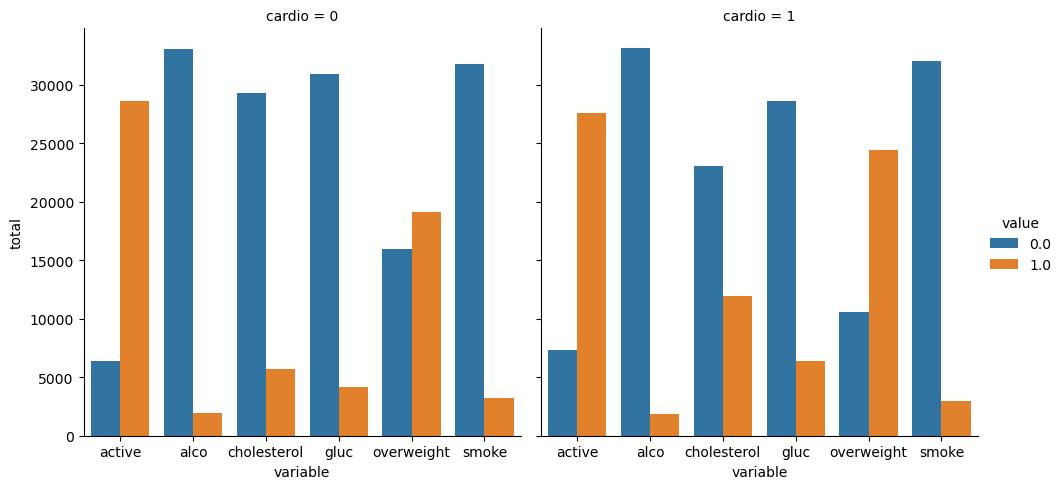

In [161]:
import matplotlib.pyplot as plt
plt.show()

Question: What does this tell us?


In [167]:
#now we need to clean the data according to the instructions
heatdf = df.loc[(df['ap_lo'] <= df['ap_hi']) &
               (df['height'] >= df['height'].quantile(0.025))&
               (df['height'] <= df['height'].quantile(0.975))&
               (df['weight'] >= df['weight'].quantile(0.025))&
               (df['weight'] <= df['weight'].quantile(0.975))]

In [164]:
#correlation matrix
corr = heatdf.corr()

In [165]:
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [168]:
import numpy as np
#import numpy for np.triup function 
#source: https://www.geeksforgeeks.org/how-to-create-a-triangle-correlation-heatmap-in-seaborn-python/

In [170]:
trimask = np.triu(corr)

In [172]:
#create the matplotlib figure to display heatmap
fig,ax = plt.subplots(figsize=(12,6))

In [175]:
mapheat = sb.heatmap(corr, mask=trimask, annot=True )

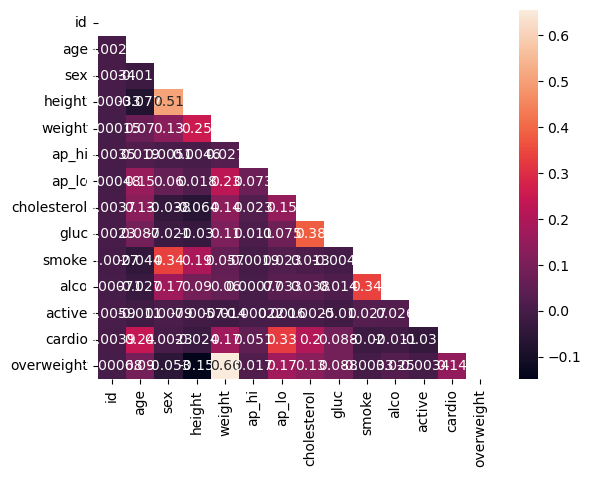

In [176]:
plt.show()
#values are too long. look at https://seaborn.pydata.org/generated/seaborn.heatmap.html to round

In [177]:
mapheat = sb.heatmap(corr, mask=trimask, annot=True, fmt='.1f' )

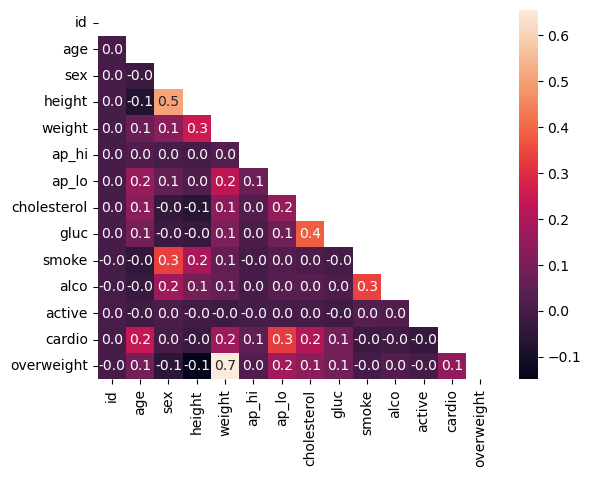

In [178]:
plt.show()
#looks better

Big Question: What does this tell us now?